In [34]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [12]:
url = "http://wheeloffortuneanswer.com"
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html')
soup

<!DOCTYPE html>

<head>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1.0" name="viewport"/>
<link href="//gmpg.org/xfn/11" rel="profile"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots"/>
<style>img:is([sizes="auto" i], [sizes^="auto," i]) { contain-intrinsic-size: 3000px 1500px }</style>
<title>Best Wheel of Fortune Solution Database - Wheel of Fortune Answer</title><link as="style" data-rocket-preload="" href="https://fonts.googleapis.com/css?family=Open%20Sans%3A400%2C700%2C700italic%2C400italic%7COpen%20Sans%20Condensed%3A300%2C700%7CAlegreya%3A400%2C400italic%2C700%2C700italic%7CAlegreya%20Sans%3A400%2C400italic%2C700%2C700italic%7CDroid%20Sans%3A400%2C700%7CDroid%20Serif%3A400%2C400italic%2C700%2C700italic%7CExo%202%3A400%2C700%7CLato%3A400%2C400italic%2C700%2C700italic%7CLora%3A400%2C400italic%2C700%2C700italic%7CArvo%3A400%2C700%2C400italic%2C700italic%7CRoboto%3A400%2C400italic%2C700%2C700it

In [14]:
soup.find_all('table')

[<table class="tablepress tablepress-id-73" id="tablepress-73">
 <thead>
 <tr class="row-1">
 <th class="column-1">Category<br/>
 (Full Answer)</th><th class="column-2">Filter<br/>
 (Beta)</th>
 </tr>
 </thead>
 <tbody class="row-striping row-hover">
 <tr class="row-2">
 <td class="column-1"><a href="https://wheeloffortuneanswer.com/around-the-house/">Around the House</a></td><td class="column-2"><a href="https://wheeloffortuneanswer.com/filter/?category=Around%20the%20House.">Around the House Filter</a></td>
 </tr>
 <tr class="row-3">
 <td class="column-1"><a href="https://wheeloffortuneanswer.com/before-and-after/">Before and After</a></td><td class="column-2"><a href="https://wheeloffortuneanswer.com/filter/?category=Before%20and%20After.">Before and After Filter</a></td>
 </tr>
 <tr class="row-4">
 <td class="column-1"><a href="https://wheeloffortuneanswer.com/book-title/">Book Title (Best Seller)</a></td><td class="column-2"><a href="https://wheeloffortuneanswer.com/filter/?catego

In [19]:
titles =soup.find_all('th')
titles

[<th class="column-1">Category<br/>
 (Full Answer)</th>,
 <th class="column-2">Filter<br/>
 (Beta)</th>]

In [22]:
titles_collection = [title.text.replace('\n',"").strip() for title in titles]
titles_collection

['Category(Full Answer)', 'Filter(Beta)']

In [26]:
##Create a a dataframe and insert these headers
df = pd.DataFrame(columns=titles_collection)
df

,Category(Full Answer),Filter(Beta)


In [28]:
column_data = soup.find_all('tr')
column_data

[<tr class="row-1">
 <th class="column-1">Category<br/>
 (Full Answer)</th><th class="column-2">Filter<br/>
 (Beta)</th>
 </tr>,
 <tr class="row-2">
 <td class="column-1"><a href="https://wheeloffortuneanswer.com/around-the-house/">Around the House</a></td><td class="column-2"><a href="https://wheeloffortuneanswer.com/filter/?category=Around%20the%20House.">Around the House Filter</a></td>
 </tr>,
 <tr class="row-3">
 <td class="column-1"><a href="https://wheeloffortuneanswer.com/before-and-after/">Before and After</a></td><td class="column-2"><a href="https://wheeloffortuneanswer.com/filter/?category=Before%20and%20After.">Before and After Filter</a></td>
 </tr>,
 <tr class="row-4">
 <td class="column-1"><a href="https://wheeloffortuneanswer.com/book-title/">Book Title (Best Seller)</a></td><td class="column-2"><a href="https://wheeloffortuneanswer.com/filter/?category=Book%20Title.">Book Title (Best Seller) Filter</a></td>
 </tr>,
 <tr class="row-5">
 <td class="column-1"><a href="ht

In [30]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]

    length = len(df)
    df.loc[length] = individual_row_data
df

,Category(Full Answer),Filter(Beta)
0,Around the House,Around the House Filter
1,Before and After,Before and After Filter
2,Book Title (Best Seller),Book Title (Best Seller) Filter
3,Classic Movie,Classic Movie Filter
4,Classic TV,Classic TV Filter
5,College Life,Not Available.
6,Event,Event Filter
7,Family,Family Filter
8,Fictional Character,Fictional Character Filter
9,Fictional Place,Fictional Place Filter


In [32]:
df.to_csv("wheelofffortuneanswer.csv",index=False)

In [36]:
text = "".join(df["Category(Full Answer)"])

<function matplotlib.pyplot.show(close=None, block=None)>

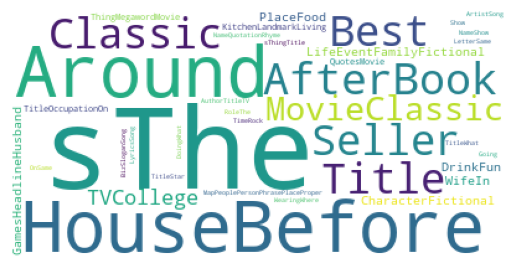

In [37]:
wordcloud = WordCloud(background_color= 'white').generate(text)
plt.Figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show